In [18]:
import numpy as np
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters

from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters

import os


In [19]:
os.getcwd()

'c:\\Users\\LENOVO\\OneDrive\\Documentos\\Estancia de Investigación'

In [34]:
st2 = read("2022/CN_PPPP_HHZ_2022_10_02.seed")

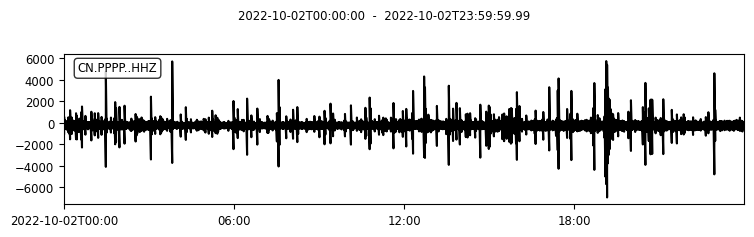

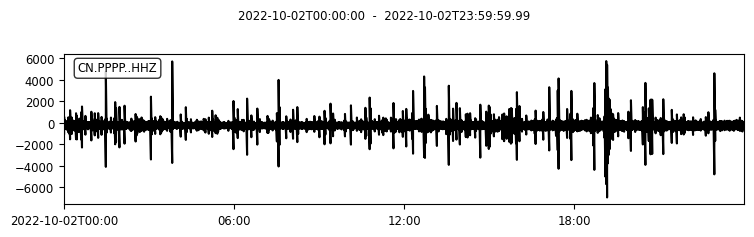

In [35]:
st2.plot()

In [42]:
trace = st2[0]

In [43]:
sampling_rate = trace.stats.sampling_rate
window_samples = int(600 * sampling_rate)

In [45]:
step_samples = int(window_samples * (1 - 0.5))

In [48]:
signal = trace.data

In [49]:
signal

array([-221.90125993, -220.85585002, -214.62940094, ..., -242.35259033,
       -238.3677873 , -246.05413573])

Calculated energy for 287 windows
            timestamp        energy
0 2022-10-02 00:05:00  3.981768e+09
1 2022-10-02 00:10:00  4.443856e+09
2 2022-10-02 00:15:00  4.447455e+09
3 2022-10-02 00:20:00  3.904110e+09
4 2022-10-02 00:25:00  4.177624e+09


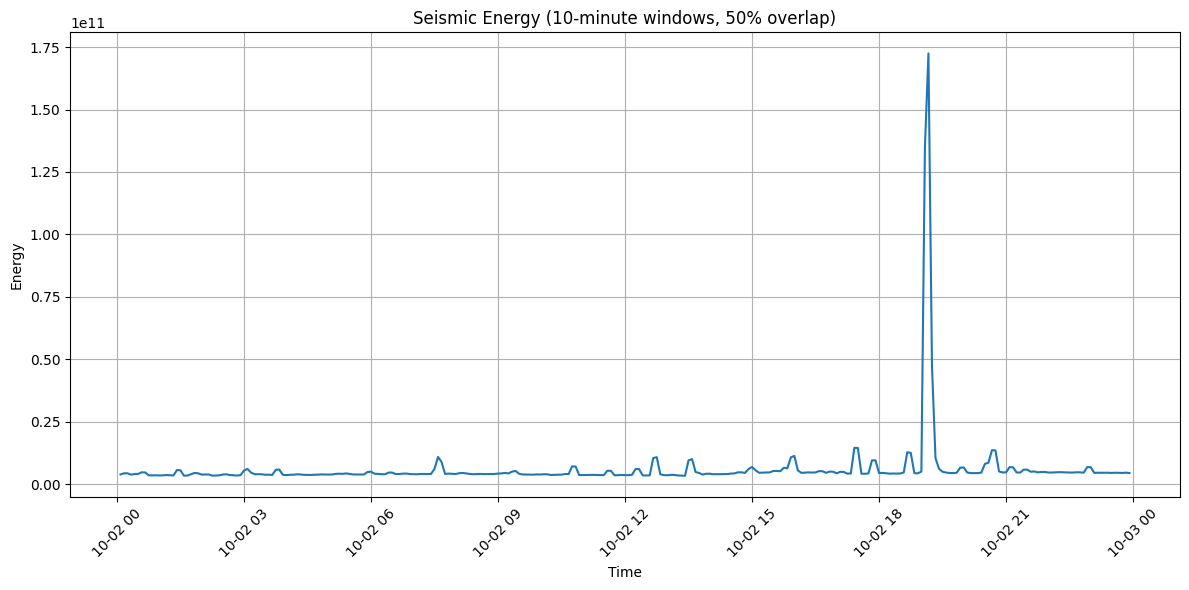

In [56]:
import numpy as np
import pandas as pd
from obspy import UTCDateTime

def calculate_energy_windowed(trace, window_size_seconds=600, overlap=0.5):
    """
    Calculate energy using sliding windows with overlap
    
    Parameters:
    - trace: ObsPy Trace object
    - window_size_seconds: window size in seconds (default: 600 = 10 minutes)
    - overlap: overlap fraction between windows (default: 0.5 = 50%)
    
    Returns:
    - DataFrame with timestamps and energy values
    """
    # Get sampling rate and calculate window size in samples
    sampling_rate = trace.stats.sampling_rate
    window_samples = int(window_size_seconds * sampling_rate)
    
    # Calculate step size (distance between window starts)
    step_samples = int(window_samples * (1 - overlap))
    
    # Get the signal data
    signal = trace.data
    
    # Initialize lists to store results
    timestamps = []
    energy_values = []
    
    # Slide the window through the signal
    for i in range(0, len(signal) - window_samples + 1, step_samples):
        # Extract window
        window = signal[i:i + window_samples]
        
        # Calculate timestamp for the center of the window
        window_center_sample = i + window_samples // 2
        timestamp = trace.stats.starttime + window_center_sample / sampling_rate
        
        # Calculate energy: mean of squared amplitudes
        energy = np.sum(window**2)
        
        # Store results
        timestamps.append(timestamp.datetime)
        energy_values.append(energy)
    
    # Create DataFrame with results
    results_df = pd.DataFrame({
        'timestamp': timestamps,
        'energy': energy_values
    })
    
    return results_df

# Example usage:
# Assuming you have a trace object called 'trace'
energy_df = calculate_energy_windowed(trace, window_size_seconds=600, overlap=0.5)

# Display the results
print(f"Calculated energy for {len(energy_df)} windows")
print(energy_df.head())

# Plot the energy time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(energy_df['timestamp'], energy_df['energy'])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Seismic Energy (10-minute windows, 50% overlap)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Calculated energy for 287 windows
            timestamp   Kurtosis
0 2022-10-02 00:05:00   5.943476
1 2022-10-02 00:10:00  13.276566
2 2022-10-02 00:15:00  12.049517
3 2022-10-02 00:20:00   4.062711
4 2022-10-02 00:25:00   9.798152


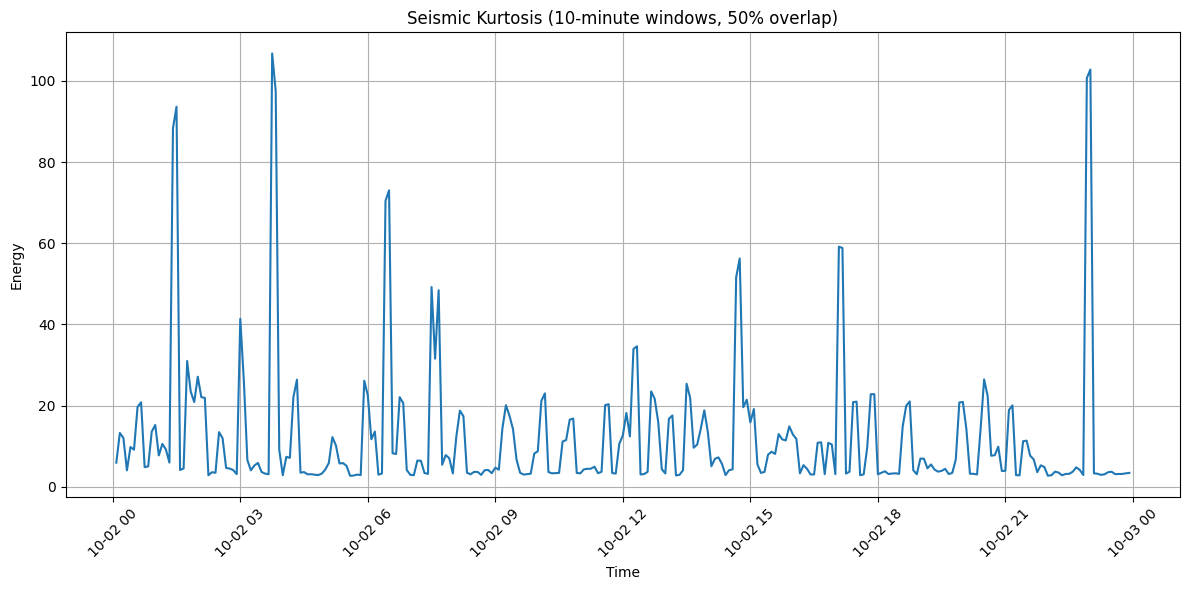

In [64]:
def calculate_kurtosis_windowed(trace, window_size_seconds=600, overlap=0.5):
    """
    Calculate energy using sliding windows with overlap
    
    Parameters:
    - trace: ObsPy Trace object
    - window_size_seconds: window size in seconds (default: 600 = 10 minutes)
    - overlap: overlap fraction between windows (default: 0.5 = 50%)
    
    Returns:
    - DataFrame with timestamps and energy values
    """
    # Get sampling rate and calculate window size in samples
    sampling_rate = trace.stats.sampling_rate
    window_samples = int(window_size_seconds * sampling_rate)
    
    # Calculate step size (distance between window starts)
    step_samples = int(window_samples * (1 - overlap))
    
    # Get the signal data
    signal = trace.data
    
    # Initialize lists to store results
    timestamps = []
    kurtosis_values = []
    
    # Slide the window through the signal
    for i in range(0, len(signal) - window_samples + 1, step_samples):
        # Extract window
        window = signal[i:i + window_samples]
        
        # Calculate timestamp for the center of the window
        window_center_sample = i + window_samples // 2
        timestamp = trace.stats.starttime + window_center_sample / sampling_rate
        
        # Calculate energy: mean of squared amplitudes
        kurtosis = (np.sum(((window - np.mean(window))/(np.std(window)))**4))/window_samples
        
        # Store results
        timestamps.append(timestamp.datetime)
        kurtosis_values.append(kurtosis)
    
    # Create DataFrame with results
    results_df = pd.DataFrame({
        'timestamp': timestamps,
        'Kurtosis': kurtosis_values
    })
    
    return results_df

# Example usage:
# Assuming you have a trace object called 'trace'
kurtosis_df = calculate_kurtosis_windowed(trace, window_size_seconds=600, overlap=0.5)

# Display the results
print(f"Calculated energy for {len(kurtosis_df)} windows")
print(kurtosis_df.head())

# Plot the energy time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(kurtosis_df['timestamp'], kurtosis_df['Kurtosis'])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Seismic Kurtosis (10-minute windows, 50% overlap)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
kurtosis_df

,timestamp,energy
0,2022-10-02 00:05:00,2.665330e-23
1,2022-10-02 00:10:00,8.504211e-23
2,2022-10-02 00:15:00,-1.129377e-23
3,2022-10-02 00:20:00,-3.756309e-22
4,2022-10-02 00:25:00,1.773122e-23
...,...,...
282,2022-10-02 23:35:00,1.146318e-22
283,2022-10-02 23:40:00,-1.865731e-22
284,2022-10-02 23:45:00,-7.329658e-23
285,2022-10-02 23:50:00,-8.097635e-23


In [57]:
energy_df

,timestamp,energy
0,2022-10-02 00:05:00,3.981768e+09
1,2022-10-02 00:10:00,4.443856e+09
2,2022-10-02 00:15:00,4.447455e+09
3,2022-10-02 00:20:00,3.904110e+09
4,2022-10-02 00:25:00,4.177624e+09
...,...,...
282,2022-10-02 23:35:00,4.675982e+09
283,2022-10-02 23:40:00,4.613624e+09
284,2022-10-02 23:45:00,4.590314e+09
285,2022-10-02 23:50:00,4.707115e+09
